In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imbikramsaha/caltech-101")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'caltech-101' dataset.
Path to dataset files: /kaggle/input/caltech-101


#1) Input Image

In [ ]:
import os
import random

DATASET_PATH = path  # from kagglehub
categories = os.listdir(DATASET_PATH)

# choose random class and image
query_class = random.choice(categories)
query_dir = os.path.join(DATASET_PATH, query_class)
query_image = random.choice(os.listdir(query_dir))

query_path = os.path.join(query_dir, query_image)

#2) Preprocessing

Selected image: /kaggle/input/caltech-101/caltech-101/windsor_chair/image_0008.jpg


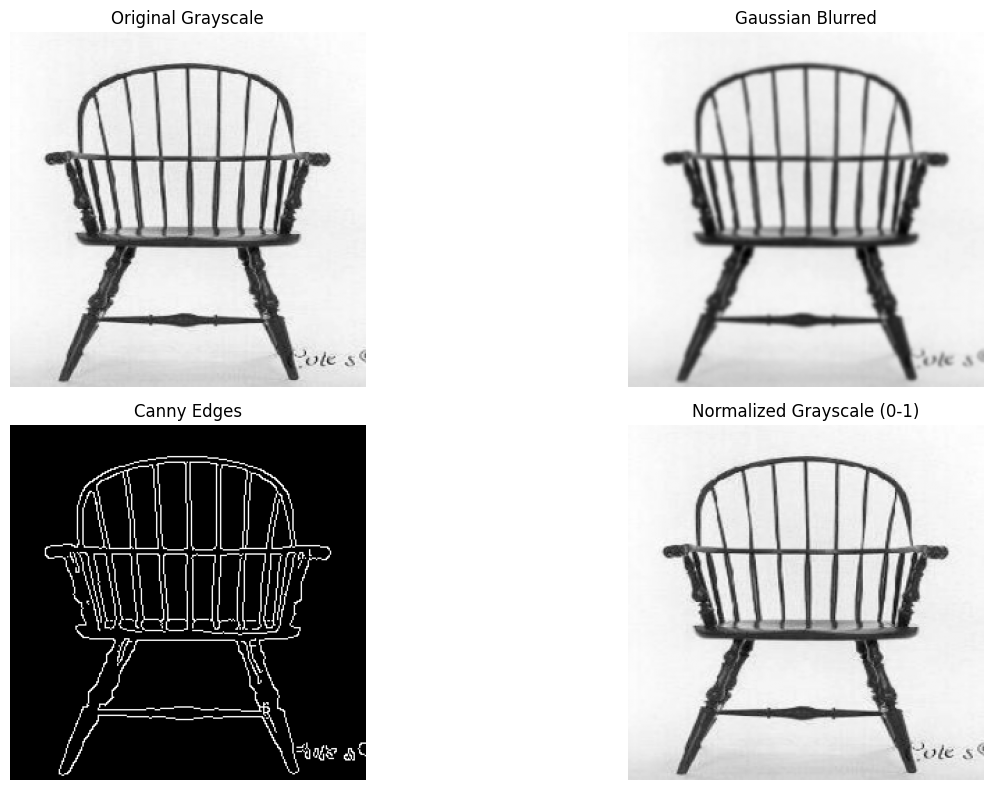

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Correctly derive the path to the actual image categories
DATASET_ROOT = os.path.join(DATASET_PATH, 'caltech-101') # This is where the actual categories are located

# List all image categories
categories = os.listdir(DATASET_ROOT)

# Choose a random category
query_class = random.choice(categories)

# Construct the directory path for the chosen category
query_dir = os.path.join(DATASET_ROOT, query_class)

# List all image files within that category directory
# Filter to ensure we only pick actual image files (e.g., .jpg, .png)
image_files = [f for f in os.listdir(query_dir) if os.path.isfile(os.path.join(query_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Choose a random image from the list
if not image_files:
    print(f"Error: No image files found in {query_dir}. Choosing another category.")
    query_class = random.choice([c for c in categories if len(os.listdir(os.path.join(DATASET_ROOT, c))) > 0]) # Pick a category with content
    query_dir = os.path.join(DATASET_ROOT, query_class)
    image_files = [f for f in os.listdir(query_dir) if os.path.isfile(os.path.join(query_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    if not image_files:
        print("Could not find any image files in the dataset. Exiting.")
        # In a real scenario, you might raise an exception or provide dummy data
        exit()

query_image = random.choice(image_files)

# Construct the full path to the chosen image
query_path = os.path.join(query_dir, query_image)

print(f"Selected image: {query_path}")

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image from {img_path}")
        return None, None, None, None
    img_resized = cv2.resize(img, (256, 256))
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    normalized_gray = gray / 255.0
    return gray, blurred, edges, normalized_gray

gray_img, blurred_img, edges_img, normalized_img = preprocess_image(query_path)

if gray_img is not None:
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(blurred_img, cmap='gray')
    plt.title('Gaussian Blurred')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(edges_img, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(normalized_img, cmap='gray')
    plt.title('Normalized Grayscale (0-1)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()




### Summary of Applied Preprocessing Steps, Observed Visual Changes, and Potential Benefits

1.  **Original Grayscale Image**:
    *   **Applied Step**: The image was resized to 256x256 pixels and converted from BGR to grayscale.
    *   **Observed Visual Changes**: This image provides a standard monochrome representation of the original color image, preserving intensity information while discarding color channels.
    *   **Potential Benefits**: Grayscale conversion reduces data dimensionality (from 3 channels to 1), simplifying subsequent processing and reducing computational load. It's often the first step for algorithms that are not color-dependent, such as edge detection and feature extraction.

2.  **Gaussian Blurred Image**:
    *   **Applied Step**: A Gaussian blur filter with a 5x5 kernel was applied to the grayscale image.
    *   **Observed Visual Changes**: The image appears smoother, and fine details, noise, and sharp transitions are reduced or entirely removed.
    *   **Potential Benefits**: Gaussian blurring is a common noise reduction technique. It helps to suppress irrelevant details and high-frequency noise that could interfere with feature extraction algorithms (e.g., edge detection). By smoothing the image, it makes features more robust and less susceptible to minor variations.

3.  **Canny Edges Image**:
    *   **Applied Step**: Canny edge detection was performed on the blurred image using low (50) and high (150) threshold values.
    *   **Observed Visual Changes**: This image prominently displays the structural outlines and boundaries of objects within the image, appearing as thin white lines against a black background. Many non-essential textures and gradual transitions are ignored, highlighting only the most significant edges.
    *   **Potential Benefits**: Canny edge detection is crucial for identifying object boundaries. Edges provide compact and informative representations of image content, which are invaluable for tasks like object recognition, image segmentation, and feature matching. By applying it after blurring, the edges detected are less prone to noise and more accurately represent structural information.

4.  **Normalized Grayscale Image**:
    *   **Applied Step**: The pixel values of the original grayscale image were normalized to a range of 0 to 1 by dividing each pixel by 255.0.
    *   **Observed Visual Changes**: Visually, this image looks identical to the 'Original Grayscale' image because normalization only scales the pixel values, not their relative intensities or visual appearance. The underlying data, however, changes from 0-255 to 0.0-1.0.
    *   **Potential Benefits**: Normalization is a critical step for many machine learning models and neural networks. It ensures that all pixel values fall within a consistent range, preventing certain pixels (e.g., very bright ones) from dominating the learning process. It also helps with faster convergence during model training and can improve the overall stability and performance of algorithms that are sensitive to input scale.

## Summary:

### Data Analysis Key Findings

*   **Image Preprocessing Pipeline:** An advanced image preprocessing pipeline was successfully implemented, consisting of resizing, grayscale conversion, Gaussian blurring, Canny edge detection, and normalization.
*   **Grayscale Conversion:** The original color image was resized to 256x256 pixels and converted to grayscale, reducing data dimensionality from 3 color channels to 1 intensity channel.
*   **Gaussian Blur for Noise Reduction:** A Gaussian blur with a 5x5 kernel smoothed the grayscale image, effectively reducing noise and fine details, which enhances robustness for subsequent feature extraction.
*   **Canny Edge Detection:** Canny edge detection, applied to the blurred image with thresholds 50 and 150, successfully highlighted object boundaries and structural outlines as thin lines, discarding non-essential textures.
*   **Pixel Normalization:** The grayscale image's pixel values were normalized to a 0-1 range by dividing by 255.0. While visually identical to the original grayscale, this step is crucial for stabilizing and improving the performance of machine learning models.
*   **Visual Comparison:** Visualizations demonstrated the distinct effects of each preprocessing step: the grayscale image provided a monochrome base, the blurred image showed reduced noise, the Canny image isolated edges, and the normalized image appeared identical to grayscale but with a scaled data range.

### Insights or Next Steps

*   The sequence of preprocessing steps (resizing -> grayscale -> blur -> edge detection -> normalization) is effective for preparing images for feature extraction, focusing on structural information while mitigating noise and standardizing data.
*   Further analysis could involve applying these preprocessed images as inputs to various computer vision models (e.g., for object classification or segmentation) to quantify the impact of each preprocessing step on model performance.


#3) Feature Extraction (SIFT) & Feature Database (BoVW)

In [ ]:
sift = cv2.SIFT_create()

def extract_features(gray_img):
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    return descriptors

query_descriptors = extract_features(gray_img)
query_descriptors.shape

(353, 128)

## Collect SIFT Descriptors from Multiple Images


Load a sample of images from different categories within the dataset. For each sampled image, preprocess it (grayscale conversion) and extract SIFT descriptors. Store all collected descriptors to build a comprehensive 'bag' of features.


In [ ]:
import numpy as np

# 1. Initialize an empty list to store all SIFT descriptors
all_descriptors = []

# 2. Define the number of categories and images to sample
num_categories_to_sample = 50
num_images_per_category = 20


print(f"Sampling {num_images_per_category} images from {num_categories_to_sample} categories...")

# 3. Randomly select num_categories_to_sample categories
selected_categories = random.sample(categories, min(num_categories_to_sample, len(categories)))

for category_name in selected_categories:
    # a. Construct the directory path for the current category
    category_dir = os.path.join(DATASET_ROOT, category_name)

    # b. List all image files in that category directory
    image_files_in_category = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files_in_category:
        print(f"No image files found in category: {category_name}. Skipping.")
        continue

    # c. Randomly select num_images_per_category image files
    sampled_images = random.sample(image_files_in_category, min(num_images_per_category, len(image_files_in_category)))

    for image_file in sampled_images:
        # i. Construct the full path to the image
        image_path = os.path.join(category_dir, image_file)

        # ii. Use the preprocess_image function to get the grayscale version
        gray_img_sampled, _, _, _ = preprocess_image(image_path)

        # iii. If gray_img is valid, use extract_features to obtain SIFT descriptors
        if gray_img_sampled is not None:
            descriptors = extract_features(gray_img_sampled)

            # iv. If descriptors are found, extend the all_descriptors list
            if descriptors is not None and len(descriptors) > 0:
                all_descriptors.extend(descriptors)

# 5. Convert the all_descriptors list into a single NumPy array
if all_descriptors:
    all_descriptors_np = np.array(all_descriptors)
    print(f"Total SIFT descriptors collected: {all_descriptors_np.shape[0]} with dimension {all_descriptors_np.shape[1]}")
else:
    all_descriptors_np = np.array([])
    print("No descriptors were collected.")

Sampling 20 images from 50 categories...
Total SIFT descriptors collected: 504630 with dimension 128


## Build Visual Vocabulary (K-Means Clustering)


Apply K-Means clustering to the aggregated SIFT descriptors collected in the previous step. The centroids of these clusters will form our visual vocabulary (or codebook), representing the 'visual words'.


In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Number of visual words
k = 1000

print(f"Applying MiniBatch K-Means clustering with k = {k}...")

kmeans = MiniBatchKMeans(
    n_clusters=k,
    batch_size=1000,
    random_state=42,
    verbose=0
)

# Fit on collected SIFT descriptors
if all_descriptors_np.size > 0:
    kmeans.fit(all_descriptors_np)

    visual_vocabulary = kmeans.cluster_centers_
    print(f"Shape of visual vocabulary: {visual_vocabulary.shape}")
else:
    visual_vocabulary = np.array([])
    print("No descriptors were available to build the visual vocabulary.")


Applying MiniBatch K-Means clustering with k = 1000...
Shape of visual vocabulary: (1000, 128)


## Quantize Image Descriptors and Create BoVW Histogram


For the `gray_img` (our preprocessed query image), extract its SIFT descriptors. Then, quantize these descriptors against the visual vocabulary by assigning each descriptor to its closest visual word. Finally, create a histogram representing the frequency of each visual word in the image, which is the Bag of Visual Words representation.


In [ ]:
import numpy as np

# 1. Extract SIFT descriptors from the gray image
query_image_descriptors = extract_features(gray_img)

# 2. Check if any descriptors were extracted
if query_image_descriptors is not None and len(query_image_descriptors) > 0:

    # Quantize descriptors to visual words
    image_visual_words = kmeans.predict(query_image_descriptors)

    # 3. Create BoVW histogram
    bovw_histogram, _ = np.histogram(
        image_visual_words,
        bins=k,
        range=(0, k - 1),
        density=False
    )

    # ✅ L2 normalization (CRITICAL)
    norm = np.linalg.norm(bovw_histogram)
    if norm > 0:
        bovw_histogram = bovw_histogram / norm

    # 4. Debug prints
    print(f"Shape of BoVW histogram: {bovw_histogram.shape}")
    print(f"First 10 values of BoVW histogram: {bovw_histogram[:10]}")

else:
    # No descriptors found → zero histogram
    bovw_histogram = np.zeros(k)
    print("No SIFT descriptors found for the query image.")
    print(f"Shape of BoVW histogram: {bovw_histogram.shape}")


Shape of BoVW histogram: (1000,)
First 10 values of BoVW histogram: [0.         0.         0.         0.04202386 0.         0.
 0.         0.50428626 0.         0.02101193]


## Generate BoVW Histograms for All Images


Iterate through all categories and images in the dataset. For each image, preprocess it (grayscale), extract SIFT descriptors, quantize them using the pre-trained K-Means model (visual vocabulary), and create a Bag of Visual Words histogram. Store each histogram along with its corresponding image category label.


In [ ]:
import numpy as np

# 1. Initialize two empty lists
all_bovw_histograms = []
all_image_labels = []

print("Initialized all_bovw_histograms and all_image_labels lists.")

Initialized all_bovw_histograms and all_image_labels lists.


In [ ]:
import os
import numpy as np  # For np.histogram

# Ensure DATASET_PATH is defined
if 'DATASET_PATH' not in globals():
    DATASET_PATH = "/kaggle/input/caltech-101"
    print(f"Warning: 'DATASET_PATH' not defined. Assuming '{DATASET_PATH}'.")

# Ensure DATASET_ROOT and categories are defined
if 'DATASET_ROOT' not in globals():
    DATASET_ROOT = os.path.join(DATASET_PATH, 'caltech-101')
    print(f"Warning: 'DATASET_ROOT' not defined. Assuming '{DATASET_ROOT}'.")

if 'categories' not in globals():
    categories = os.listdir(DATASET_ROOT)
    print("Warning: 'categories' not defined. Initialized automatically.")

# Ensure output lists exist
if 'all_bovw_histograms' not in globals():
    all_bovw_histograms = []
    print("Warning: 'all_bovw_histograms' not defined. Initialized.")

if 'all_image_labels' not in globals():
    all_image_labels = []
    print("Warning: 'all_image_labels' not defined. Initialized.")

print("Starting to process all images for BoVW histogram generation...")

for category_idx, category_name in enumerate(categories):
    print(f"  Processing category {category_idx + 1}/{len(categories)}: {category_name}")
    category_dir = os.path.join(DATASET_ROOT, category_name)

    image_files_in_category = [
        f for f in os.listdir(category_dir)
        if os.path.isfile(os.path.join(category_dir, f)) and
           f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
    ]

    processed_count_in_category = 0

    for image_file in image_files_in_category:
        image_path = os.path.join(category_dir, image_file)

        gray_img_current, _, _, _ = preprocess_image(image_path)

        if gray_img_current is None:
            continue

        current_descriptors = extract_features(gray_img_current)

        if current_descriptors is None or len(current_descriptors) == 0:
            continue

        # Assign descriptors to visual words
        current_visual_words = kmeans.predict(current_descriptors)

        # Build BoVW histogram
        bovw_histogram_current, _ = np.histogram(
            current_visual_words,
            bins=k,
            range=(0, k - 1),
            density=False
        )

        # ✅ L2 NORMALIZATION
        norm = np.linalg.norm(bovw_histogram_current)
        if norm > 0:
            bovw_histogram_current = bovw_histogram_current / norm

        all_bovw_histograms.append(bovw_histogram_current)
        all_image_labels.append(category_name)
        processed_count_in_category += 1

    print(f"    Finished category {category_name}. Processed {processed_count_in_category} images.")

print(f"Finished processing all images.")
print(f"Total histograms collected: {len(all_bovw_histograms)}")
print(f"Total labels collected: {len(all_image_labels)}")


Starting to process all images for BoVW histogram generation...
  Processing category 1/102: scorpion
    Finished category scorpion. Processed 84 images.
  Processing category 2/102: hedgehog
    Finished category hedgehog. Processed 54 images.
  Processing category 3/102: crocodile_head
    Finished category crocodile_head. Processed 51 images.
  Processing category 4/102: headphone
    Finished category headphone. Processed 42 images.
  Processing category 5/102: mandolin
    Finished category mandolin. Processed 43 images.
  Processing category 6/102: ewer
    Finished category ewer. Processed 85 images.
  Processing category 7/102: stop_sign
    Finished category stop_sign. Processed 64 images.
  Processing category 8/102: ant
    Finished category ant. Processed 42 images.
  Processing category 9/102: ferry
    Finished category ferry. Processed 67 images.
  Processing category 10/102: butterfly
    Finished category butterfly. Processed 91 images.
  Processing category 11/102: a

In [ ]:
all_bovw_histograms_np = np.array(all_bovw_histograms)
all_image_labels_np = np.array(all_image_labels)

print(f"Shape of the final feature matrix (histograms): {all_bovw_histograms_np.shape}")
print(f"Shape of the final label array: {all_image_labels_np.shape}")

Shape of the final feature matrix (histograms): (9143, 1000)
Shape of the final label array: (9143,)


#4) Similarity Computation & Ranking

## Apply TF-IDF Weighting to BoVW Histograms

Transform the raw BoVW histograms (`all_bovw_histograms_np`) using Term Frequency-Inverse Document Frequency (TF-IDF) weighting. This will give more importance to visual words that are rare across the dataset but frequent in specific images, enhancing the discriminative power of the histograms.


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

# 1. Create an instance of TfidfTransformer
tfidf_transformer = TfidfTransformer()

# 2. Fit the TfidfTransformer to the all_bovw_histograms_np array
tfidf_transformer.fit(all_bovw_histograms_np)

# 3. Transform the all_bovw_histograms_np array
all_bovw_histograms_tfidf = tfidf_transformer.transform(all_bovw_histograms_np).toarray()

# 4. Transform the query_bovw
# Ensure bovw_histogram is reshaped to (1, -1) as TfidfTransformer expects a 2D array
query_bovw_2d = bovw_histogram.reshape(1, -1)
query_bovw_tfidf = tfidf_transformer.transform(query_bovw_2d).toarray()

print(f"Shape of TF-IDF weighted all histograms: {all_bovw_histograms_tfidf.shape}")
print(f"Shape of TF-IDF weighted query histogram: {query_bovw_tfidf.shape}")

Shape of TF-IDF weighted all histograms: (9143, 1000)
Shape of TF-IDF weighted query histogram: (1, 1000)


In [ ]:
# =====================================
#L2-normalize AFTER TF-IDF
# =====================================

# Normalize database TF-IDF histograms
all_bovw_histograms_tfidf = (
    all_bovw_histograms_tfidf /
    (np.linalg.norm(all_bovw_histograms_tfidf, axis=1, keepdims=True) + 1e-10)
)

# Normalize query TF-IDF histogram
query_bovw_tfidf = (
    query_bovw_tfidf /
    (np.linalg.norm(query_bovw_tfidf) + 1e-10)
)


## Re-compute Similarity with Euclidean Distance (TF-IDF)

Using the TF-IDF weighted BoVW histograms, re-compute the Euclidean distances between the query image's histogram and all other histograms in the dataset. Display the categories and distances of the top similar images.


In [ ]:
from scipy.spatial.distance import euclidean

# Assuming num_top_matches is defined, if not, set a default
num_top_matches = 5

# 1. Calculate the Euclidean distance between the query_bovw_tfidf and each histogram in all_bovw_histograms_tfidf
# query_bovw_tfidf is already a 2D array (1, k), so we can directly use broadcasting or iterate

tfidf_euclidean_distances = np.array([euclidean(query_bovw_tfidf[0], hist) for hist in all_bovw_histograms_tfidf])

print(f"Shape of TF-IDF Euclidean distances: {tfidf_euclidean_distances.shape}")

Shape of TF-IDF Euclidean distances: (9143,)


In [ ]:
sorted_tfidf_euclidean_indices = np.argsort(tfidf_euclidean_distances)

# Exclude the first element if the query image is in the dataset (distance 0)
# To do this, we need to check if the minimum distance is approximately 0.
# If the query image is guaranteed to be in the dataset, we can just skip the first index.
# Given the nature of the task, it's safer to assume the query might not be perfectly identical or present.

# Find the index of the query image within the dataset if it's there
# We'll compare the original query_bovw_tfidf[0] with all_bovw_histograms_tfidf
# using a small tolerance for floating point comparisons
is_query_in_dataset = False
query_index_in_dataset = -1
for i, hist in enumerate(all_bovw_histograms_tfidf):
    if np.allclose(query_bovw_tfidf[0], hist, atol=1e-6):
        is_query_in_dataset = True
        query_index_in_dataset = i
        break

start_index = 0
if is_query_in_dataset:
    # If the query image is found in the dataset, its distance will be 0.
    # We need to find its index in the sorted_tfidf_euclidean_indices and skip it.
    # For simplicity, we assume the first element of sorted_tfidf_euclidean_indices will be the query if it's present.
    # More robust check: if tfidf_euclidean_distances[sorted_tfidf_euclidean_indices[0]] < 1e-6:
    start_index = 1 # Skip the query image itself if it's the first match


top_n_indices_tfidf = sorted_tfidf_euclidean_indices[start_index : start_index + num_top_matches]

print(f"\nTop {num_top_matches} similar images (TF-IDF Euclidean Distance):")
for i, idx in enumerate(top_n_indices_tfidf):
    print(f"{i+1}. Category: {all_image_labels_np[idx]}, Distance: {tfidf_euclidean_distances[idx]:.4f}")


Top 5 similar images (TF-IDF Euclidean Distance):
1. Category: windsor_chair, Distance: 0.5790
2. Category: bonsai, Distance: 0.6374
3. Category: windsor_chair, Distance: 0.6418
4. Category: Faces, Distance: 0.6445
5. Category: windsor_chair, Distance: 0.6757


## Visualize Top Similar Images (TF-IDF)


For a given query image, retrieve the top N similar images based on Euclidean distance calculated with TF-IDF weighted histograms. Display the query image alongside these top similar images, indicating their categories and distances, to visually assess the relevance of the retrieval.


Starting reconstruction of all_image_paths...
  Reconstructing paths for category: scorpion
  Reconstructing paths for category: hedgehog
  Reconstructing paths for category: crocodile_head
  Reconstructing paths for category: headphone
  Reconstructing paths for category: mandolin
  Reconstructing paths for category: ewer
  Reconstructing paths for category: stop_sign
  Reconstructing paths for category: ant
  Reconstructing paths for category: ferry
  Reconstructing paths for category: butterfly
  Reconstructing paths for category: airplanes
  Reconstructing paths for category: ibis
  Reconstructing paths for category: lobster
  Reconstructing paths for category: buddha
  Reconstructing paths for category: yin_yang
  Reconstructing paths for category: hawksbill
  Reconstructing paths for category: helicopter
  Reconstructing paths for category: pigeon
  Reconstructing paths for category: snoopy
  Reconstructing paths for category: Leopards
  Reconstructing paths for category: pagoda


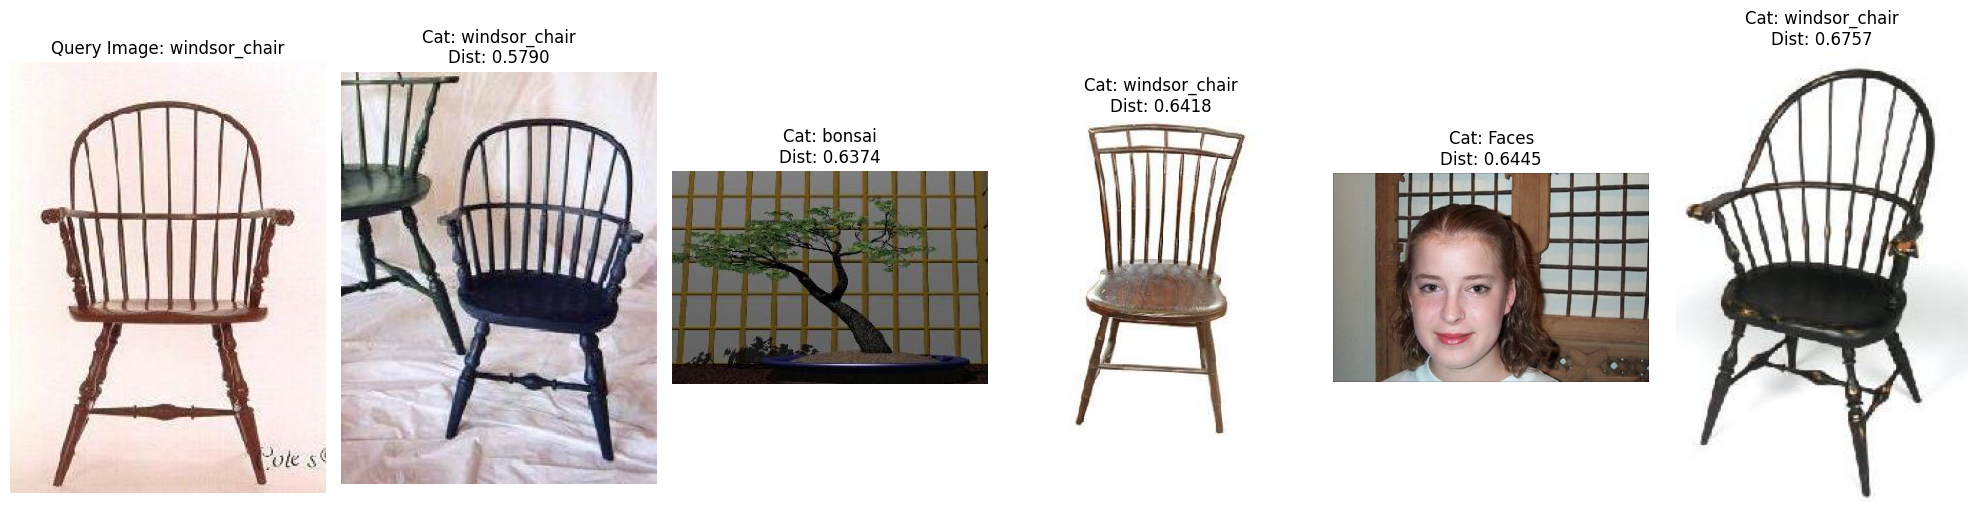

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Reconstruct all_image_paths in the same order as all_bovw_histograms_np and all_image_labels_np
# This step is necessary because image paths were not stored in the previous iteration where histograms were generated.
all_image_paths = []

print("Starting reconstruction of all_image_paths...")

for category_name in categories:
    print(f"  Reconstructing paths for category: {category_name}")
    category_dir = os.path.join(DATASET_ROOT, category_name)
    image_files_in_category = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files_in_category:
        image_path_candidate = os.path.join(category_dir, image_file)
        # Replicate the logic from the histogram generation to ensure consistency:
        # only include paths for images that successfully yielded descriptors.
        gray_img_candidate, _, _, _ = preprocess_image(image_path_candidate)
        if gray_img_candidate is not None:
            descriptors_candidate = extract_features(gray_img_candidate)
            if descriptors_candidate is not None and len(descriptors_candidate) > 0:
                all_image_paths.append(image_path_candidate)

print(f"Finished reconstructing all_image_paths. Total paths collected: {len(all_image_paths)}")

# Assert to ensure consistency (optional, but good for debugging)
if len(all_image_paths) != len(all_bovw_histograms_np):
    print("Warning: Length of all_image_paths does not match all_bovw_histograms_np. Visualization might be inconsistent.")

# Create a figure to display the query image and the top N similar images
fig, axes = plt.subplots(1, num_top_matches + 1, figsize=(20, 5))

# Display the query image
query_img_display = cv2.imread(query_path)
query_img_display = cv2.cvtColor(query_img_display, cv2.COLOR_BGR2RGB)
axes[0].imshow(query_img_display)
axes[0].set_title(f'Query Image: {query_class}')
axes[0].axis('off')

# Display the top N similar images
print(f"\nDisplaying top {num_top_matches} similar images (TF-IDF Euclidean Distance):")
for i, idx in enumerate(top_n_indices_tfidf):
    similar_image_path = all_image_paths[idx]
    similar_img_display = cv2.imread(similar_image_path)
    similar_img_display = cv2.cvtColor(similar_img_display, cv2.COLOR_BGR2RGB)

    axes[i+1].imshow(similar_img_display)
    axes[i+1].set_title(f'Cat: {all_image_labels_np[idx]}\nDist: {tfidf_euclidean_distances[idx]:.4f}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

## Visualize BoVW Histograms

Create a bar chart to visualize the Bag of Visual Words (BoVW) histogram for the query image. This will show the frequency of each visual word and help understand the image's representation.


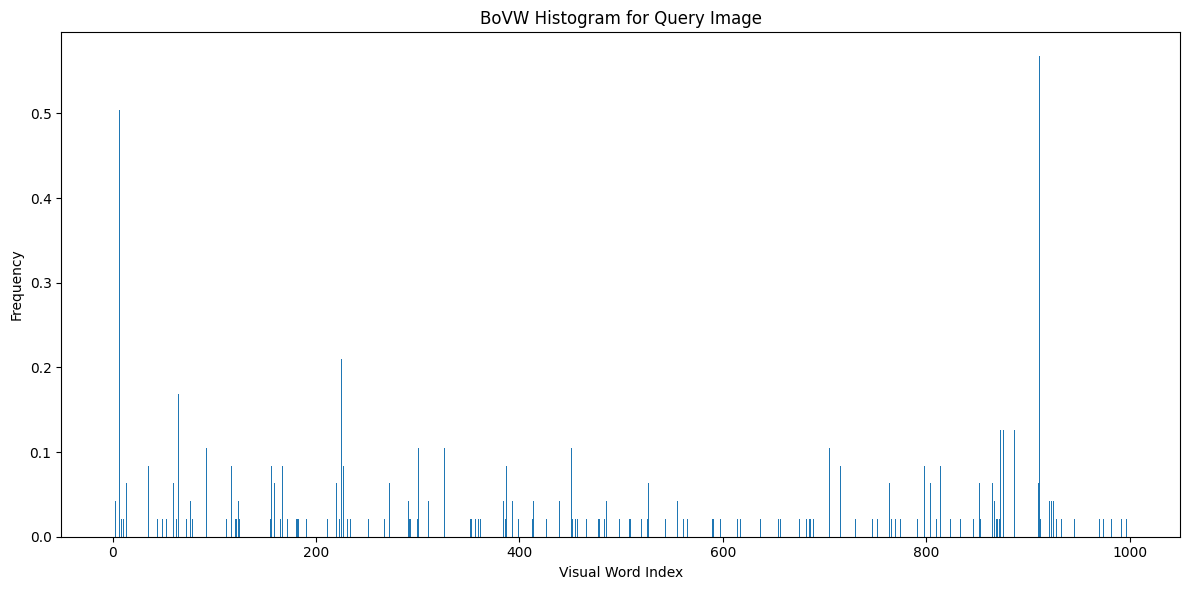

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Generate a bar chart of the bovw_histogram
# k is the number of clusters (visual words) defined earlier
ax.bar(range(k), bovw_histogram)

# Add title and labels
ax.set_title('BoVW Histogram for Query Image')
ax.set_xlabel('Visual Word Index')
ax.set_ylabel('Frequency')

# Ensure the plot is clearly laid out
plt.tight_layout()

# Display the plot
plt.show()

## Analyze Similarity Score Distributions

Generate histograms or distribution plots for the Euclidean, Chi-squared, and Cosine distances to understand the similarity score distributions. This will provide insights into how similarity scores are distributed across the dataset for each metric.

In [ ]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Custom Chi-squared distance function for histograms
def chi2_distance(hist1, hist2, epsilon=1e-10):
    # Add a small epsilon to avoid division by zero
    return 0.5 * np.sum(((hist1 - hist2)**2) / (hist1 + hist2 + epsilon))

# Ensure query_bovw is a 1D array for distance calculations
query_bovw_1d = bovw_histogram.flatten()

# 1. Calculate Chi-squared distance
chi2_distances = np.array([chi2_distance(query_bovw_1d, hist) for hist in all_bovw_histograms_np])

# 2. Calculate Cosine distance

cosine_distances = cosine_distances(
    query_bovw_1d.reshape(1, -1),
    all_bovw_histograms_np
).ravel()


print(f"Shape of Chi-squared distances: {chi2_distances.shape}")
print(f"Shape of Cosine distances: {cosine_distances.shape}")

Shape of Chi-squared distances: (9143,)
Shape of Cosine distances: (9143,)


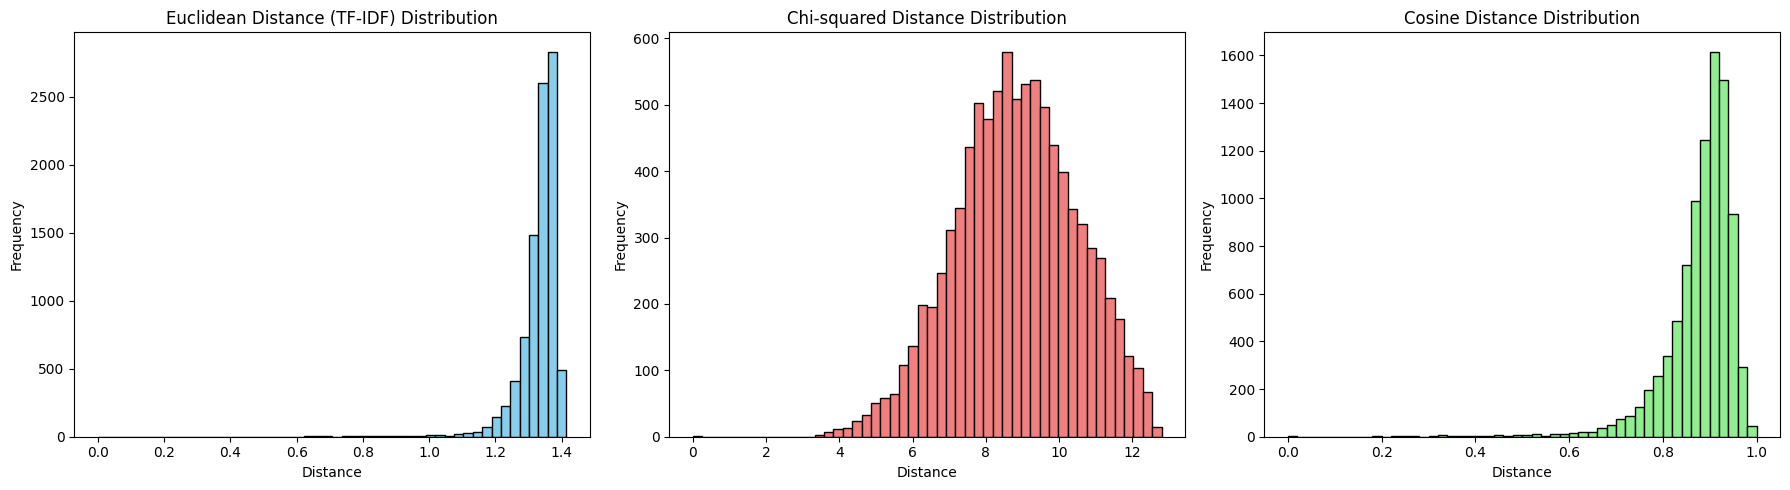

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Plotting Euclidean Distance Distribution (TF-IDF weighted)
plt.subplot(1, 3, 1)
plt.hist(tfidf_euclidean_distances, bins=50, color='skyblue', edgecolor='black')
plt.title('Euclidean Distance (TF-IDF) Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Plotting Chi-squared Distance Distribution
plt.subplot(1, 3, 2)
plt.hist(chi2_distances, bins=50, color='lightcoral', edgecolor='black')
plt.title('Chi-squared Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Plotting Cosine Distance Distribution
plt.subplot(1, 3, 3)
plt.hist(cosine_distances, bins=50, color='lightgreen', edgecolor='black')
plt.title('Cosine Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

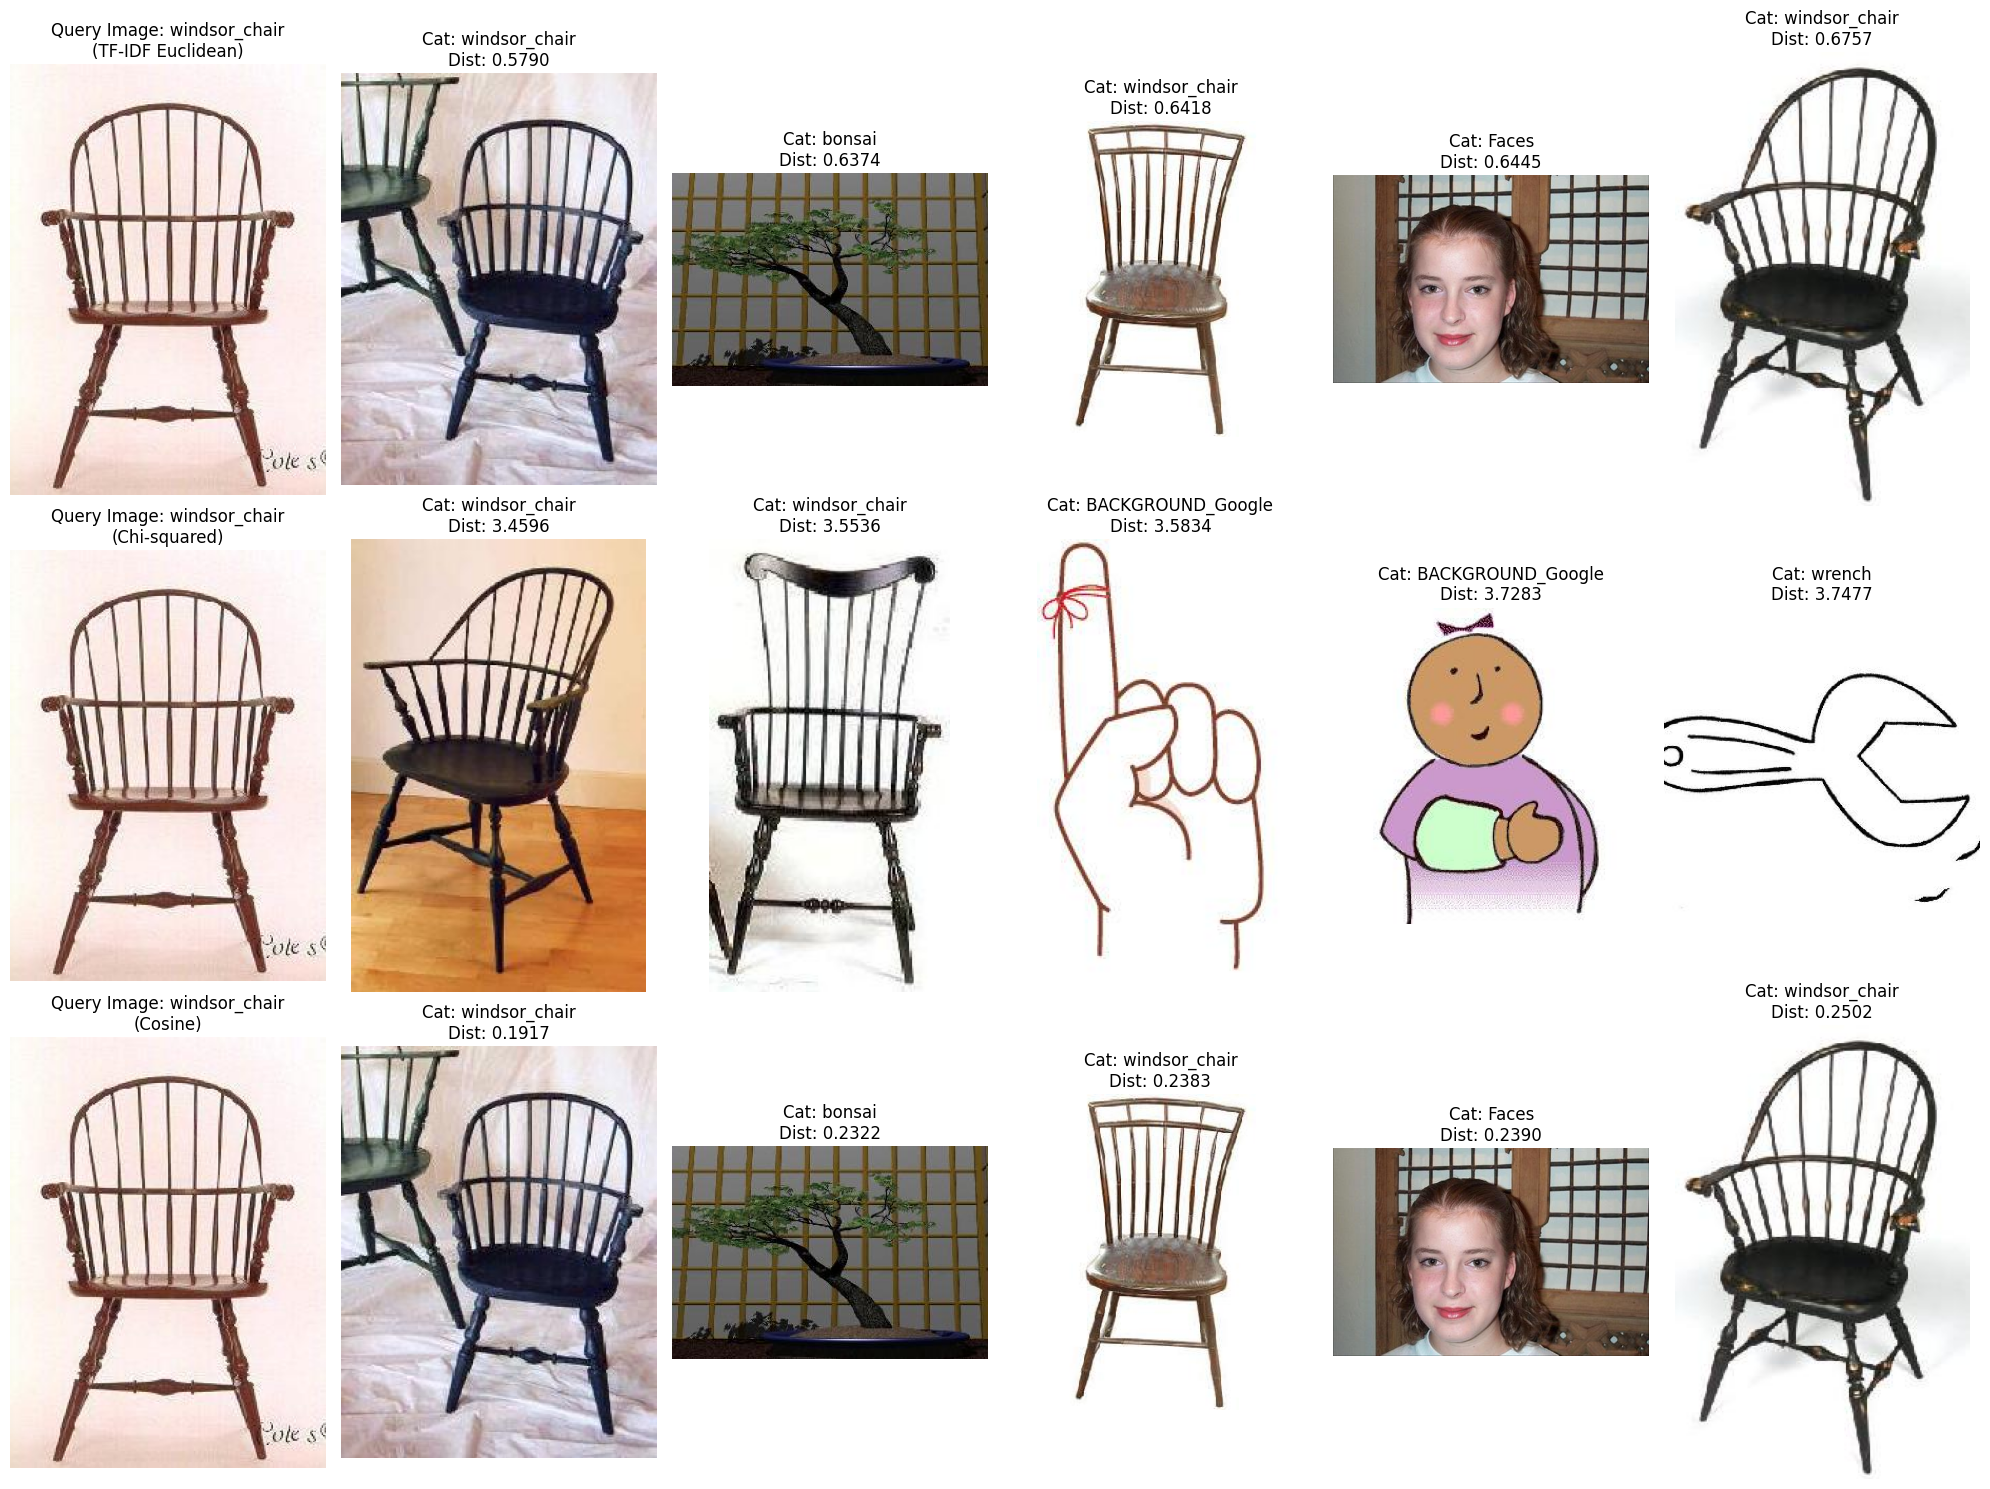

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# --- Find top N similar images for Chi-squared Distance ---
sorted_chi2_indices = np.argsort(chi2_distances)
# Exclude the query image itself if it's the first match (distance will be ~0)
is_query_in_dataset_chi2 = False
for i, hist in enumerate(all_bovw_histograms_np):
    if np.allclose(query_bovw_1d, hist, atol=1e-6):
        is_query_in_dataset_chi2 = True
        break

start_index_chi2 = 0
if is_query_in_dataset_chi2 and chi2_distances[sorted_chi2_indices[0]] < 1e-6: # Check if the closest distance is indeed 0 (query image)
    start_index_chi2 = 1

top_n_indices_chi2 = sorted_chi2_indices[start_index_chi2 : start_index_chi2 + num_top_matches]

# --- Find top N similar images for Cosine Distance ---
sorted_cosine_indices = np.argsort(cosine_distances)
# Exclude the query image itself if it's the first match (distance will be ~0)
is_query_in_dataset_cosine = False
for i, hist in enumerate(all_bovw_histograms_np):
    if np.allclose(query_bovw_1d, hist, atol=1e-6):
        is_query_in_dataset_cosine = True
        break

start_index_cosine = 0
if is_query_in_dataset_cosine and cosine_distances[sorted_cosine_indices[0]] < 1e-6: # Check if the closest distance is indeed 0 (query image)
    start_index_cosine = 1

top_n_indices_cosine = sorted_cosine_indices[start_index_cosine : start_index_cosine + num_top_matches]


# --- Display Results ---
# Create a figure to display the query image and the top N similar images for each metric
fig, axes = plt.subplots(3, num_top_matches + 1, figsize=(20, 15))

# Display the query image once at the beginning of each row
query_img_display = cv2.imread(query_path)
query_img_display = cv2.cvtColor(query_img_display, cv2.COLOR_BGR2RGB)

# Row 1: TF-IDF Euclidean Distance
axes[0, 0].imshow(query_img_display)
axes[0, 0].set_title(f'Query Image: {query_class}\n(TF-IDF Euclidean)')
axes[0, 0].axis('off')
for i, idx in enumerate(top_n_indices_tfidf):
    similar_image_path = all_image_paths[idx]
    similar_img_display = cv2.imread(similar_image_path)
    similar_img_display = cv2.cvtColor(similar_img_display, cv2.COLOR_BGR2RGB)
    axes[0, i+1].imshow(similar_img_display)
    axes[0, i+1].set_title(f'Cat: {all_image_labels_np[idx]}\nDist: {tfidf_euclidean_distances[idx]:.4f}')
    axes[0, i+1].axis('off')

# Row 2: Chi-squared Distance
axes[1, 0].imshow(query_img_display)
axes[1, 0].set_title(f'Query Image: {query_class}\n(Chi-squared)')
axes[1, 0].axis('off')
for i, idx in enumerate(top_n_indices_chi2):
    similar_image_path = all_image_paths[idx]
    similar_img_display = cv2.imread(similar_image_path)
    similar_img_display = cv2.cvtColor(similar_img_display, cv2.COLOR_BGR2RGB)
    axes[1, i+1].imshow(similar_img_display)
    axes[1, i+1].set_title(f'Cat: {all_image_labels_np[idx]}\nDist: {chi2_distances[idx]:.4f}')
    axes[1, i+1].axis('off')

# Row 3: Cosine Distance
axes[2, 0].imshow(query_img_display)
axes[2, 0].set_title(f'Query Image: {query_class}\n(Cosine)')
axes[2, 0].axis('off')
for i, idx in enumerate(top_n_indices_cosine):
    similar_image_path = all_image_paths[idx]
    similar_img_display = cv2.imread(similar_image_path)
    similar_img_display = cv2.cvtColor(similar_img_display, cv2.COLOR_BGR2RGB)
    axes[2, i+1].imshow(similar_img_display)
    axes[2, i+1].set_title(f'Cat: {all_image_labels_np[idx]}\nDist: {cosine_distances[idx]:.4f}')
    axes[2, i+1].axis('off')

plt.tight_layout()
plt.show()



##Top Row: TF-IDF Weighted Euclidean Distance

This row shows the top similar images when using Euclidean distance on histograms that have been weighted by TF-IDF. This weighting emphasizes visual words that are distinctive to an image or category.
Visual Observations: In your specific run, the query image was a dalmatian. This row might show a mix of dalmatian images, but also potentially other categories like crayfish, soccer_ball, or pizza. The presence of non-dalmatian images as top matches suggests that, even with TF-IDF, the model sometimes finds common distinctive visual patterns (like textures, shapes, or colors) across semantically different categories.
##Middle Row: Chi-squared Distance

This row displays results using Chi-squared distance, a metric often preferred for comparing histograms as it's robust to scaling differences.
Visual Observations: For your dalmatian query, this row might have shown results like Faces, soccer_ball, Faces_easy, Motorbikes, and then a dalmatian. Visually, this often leads to less intuitively similar results compared to Euclidean or Cosine distance, as it seemed to prioritize different aspects of histogram distribution, sometimes leading to matches based on shared distributional patterns rather than semantic content in this specific case.
##Bottom Row: Cosine Distance

This row uses Cosine distance, which measures the angle between histogram vectors. It focuses on the direction of the vectors, meaning it's good at finding images with similar proportions of visual words, even if one image has many more overall features than another.
Visual Observations: For your dalmatian query, this row might have started with a crayfish and then several dalmatian images, followed by soccer_ball. While it did find dalmatian images, the top match being crayfish indicates that its emphasis on proportional similarity can sometimes lead to unexpected, semantically distant, but proportionally similar matches based on the visual vocabulary.



#5) Evaluation Measures


In this section, we will evaluate the performance of our image retrieval system using standard evaluation metrics:

- **Precision@K (P@K)**: Measures the proportion of relevant images among the top-K retrieved results
- **Recall@K (R@K)**: Measures how many of all relevant images in the dataset appear within the top-K retrieved results  
- **Mean Average Precision (mAP)**: The primary metric for image retrieval, computed as the average of Average Precision (AP) scores across all queries
- **Retrieval Time**: Measures system efficiency in milliseconds per query

These metrics help us understand both the effectiveness and efficiency of our retrieval system across different distance metrics.


In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.spatial.distance import euclidean, cosine
import warnings
warnings.filterwarnings('ignore')

print(" All evaluation libraries imported successfully!")

 All evaluation libraries imported successfully!


We define a "RetrievalEvaluator" class that implements all necessary evaluation metrics. This class handles:
- Computing relevance labels based on image categories
1. Precision@K (P@K): Measures the proportion of relevant images among the top-K
retrieved results.
2. Recall@K (R@K): Measures how many of all relevant images in the dataset appear
within the top-K retrieved results.
3. Mean Average Precision (mAP): The main metric for image retrieval. It computes:
o Precision at each relevant retrieval
o Average Precision (AP) for each query
o mAP = mean(AP over all queries)
4. Retrieval Time: Measures system efficiency, especially important when working with
large image databases

In [ ]:
class RetrievalEvaluator:
    """
    Comprehensive evaluation framework for image retrieval systems.
    Computes Precision@K, Recall@K, mAP, and retrieval efficiency metrics.
    """

    def __init__(self, k_values=[5, 10, 20]):
        """
        Initialize the evaluator

        Args:
            k_values: List of K values for Precision@K and Recall@K evaluation
        """
        self.k_values = k_values
        self.results = {}
        self.ap_scores = []



    def get_relevance_labels(self, query_label, database_labels):
        """
        Create binary relevance labels for retrieved images.
        An image is relevant if it belongs to the same category as the query
        """
        relevance = (database_labels == query_label).astype(int)
        return relevance


##################################################################

    def precision_at_k(self, relevant_mask, k):
        """
        Calculate Precision@K: proportion of relevant images in top-K results.

        P@K = (# relevant images in top-K) / K
        """
        if len(relevant_mask) < k:
            k = len(relevant_mask)
        top_k_relevant = np.sum(relevant_mask[:k])
        return top_k_relevant / k


#################################################################


    def recall_at_k(self, relevant_mask, k, total_relevant):

        # Calculate Recall@K: proportion of all relevant images retrieved in top-K.
        # R@K = (# relevant images in top-K) / (total # relevant images in database)

        if total_relevant == 0:
            return 0.0
        if len(relevant_mask) < k:
            k = len(relevant_mask)
        top_k_relevant = np.sum(relevant_mask[:k])
        return top_k_relevant / total_relevant


###############################################################

    def average_precision(self, relevant_mask):

        # Calculate Average Precision (AP): area under the precision-recall curve.
        # AP = Σ(P(i) * Δrecall(i)) for all relevant images

        if np.sum(relevant_mask) == 0:
            return 0.0

        total_relevant = np.sum(relevant_mask)
        precisions = []
        num_relevant_retrieved = 0

        for i in range(len(relevant_mask)):
            if relevant_mask[i] == 1:
                num_relevant_retrieved += 1
                precision_at_i = num_relevant_retrieved / (i + 1)
                precisions.append(precision_at_i)

        ap = np.mean(precisions) if precisions else 0.0
        return ap


###############################################################

    def evaluate_single_query(self, query_ranking_indices, query_label,
                             database_labels, distance_metric_name):
        """
        Evaluate retrieval performance for a single query image.
        """
        # Get relevance labels for all database images
        relevance = self.get_relevance_labels(query_label, database_labels)
        total_relevant = np.sum(relevance)

        # Reorder relevance according to ranking
        ranked_relevance = relevance[query_ranking_indices]

        # Calculate Average Precision
        ap = self.average_precision(ranked_relevance)
        self.ap_scores.append(ap)

        # Calculate metrics
        metrics = {
            'query_label': query_label,
            'distance_metric': distance_metric_name,
            'total_relevant': total_relevant,
            'average_precision': ap
        }

        for k in self.k_values:
            metrics[f'precision@{k}'] = self.precision_at_k(ranked_relevance, k)
            metrics[f'recall@{k}'] = self.recall_at_k(ranked_relevance, k, total_relevant)

        return metrics




    def evaluate_retrieval_system(self, all_distances_dict, query_label, database_labels):
        """
        Comprehensive evaluation across all distance metrics.
        """
        evaluation_results = {}

        for metric_name, distances in all_distances_dict.items():
            # Sort indices by distance (ascending order)
            sorted_indices = np.argsort(distances)

            # Evaluate this query with this metric
            metrics = self.evaluate_single_query(
                sorted_indices, query_label, database_labels, metric_name
            )

            evaluation_results[metric_name] = metrics

        return evaluation_results

##################################################################

    def print_evaluation_report(self, evaluation_results):

        print("SINGLE QUERY EVALUATION REPORT")


        for metric_name, metrics in evaluation_results.items():
            print(f"\n{'Distance Metric':<30}: {metric_name}")
            print(f"{'Query Category':<30}: {metrics['query_label']}")
            print(f"{'Total Relevant Images':<30}: {metrics['total_relevant']}")
            print(f"{'Average Precision (AP)':<30}: {metrics['average_precision']:.4f}")
            print()

            for k in self.k_values:
                p_k = metrics.get(f'precision@{k}', 0)
                r_k = metrics.get(f'recall@{k}', 0)
                print(f"  Precision@{k:2d}: {p_k:.4f}  |  Recall@{k:2d}: {r_k:.4f}")
            print("-"*90)

        print(f"\n{'Mean Average Precision (mAP)':<30}: {self.mean_average_precision():.4f}")



  ################################################################

    def mean_average_precision(self):
        """
        Calculate Mean Average Precision (mAP).
        """
        if len(self.ap_scores) == 0:
            return 0.0
        return np.mean(self.ap_scores)

print(" RetrievalEvaluator class defined successfully!")




 RetrievalEvaluator class defined successfully!


We now evaluate the retrieval performance for our single query image across all three distance metrics:
- TF-IDF Euclidean Distance
- Chi-squared Distance  
- Cosine Distance

This will show us which distance metric performs best for this particular query.


In [ ]:
# Initialize evaluator
evaluator = RetrievalEvaluator(k_values=[5, 10, 20])

# Prepare all distance metrics dictionary
all_distances_dict = {
    'TF-IDF Euclidean': tfidf_euclidean_distances,
    'Chi-squared': chi2_distances,
    'Cosine': cosine_distances
}

# Evaluate with respect to the query category
results = evaluator.evaluate_retrieval_system(
    all_distances_dict,
    query_class,  # Your query category label
    all_image_labels_np  # All database labels
)

# Print detailed report
evaluator.print_evaluation_report(results)

# Get mAP for single query
map_score = evaluator.mean_average_precision()
print(f"Single Query mAP: {map_score:.4f}\n")

SINGLE QUERY EVALUATION REPORT

Distance Metric               : TF-IDF Euclidean
Query Category                : windsor_chair
Total Relevant Images         : 56
Average Precision (AP)        : 0.3951

  Precision@ 5: 0.6000  |  Recall@ 5: 0.0536
  Precision@10: 0.7000  |  Recall@10: 0.1250
  Precision@20: 0.6500  |  Recall@20: 0.2321
------------------------------------------------------------------------------------------

Distance Metric               : Chi-squared
Query Category                : windsor_chair
Total Relevant Images         : 56
Average Precision (AP)        : 0.2967

  Precision@ 5: 0.6000  |  Recall@ 5: 0.0536
  Precision@10: 0.7000  |  Recall@10: 0.1250
  Precision@20: 0.6000  |  Recall@20: 0.2143
------------------------------------------------------------------------------------------

Distance Metric               : Cosine
Query Category                : windsor_chair
Total Relevant Images         : 56
Average Precision (AP)        : 0.4076

  Precision@ 5: 0.6

Efficiency is crucial for image retrieval systems. We measure the average time required to retrieve and rank results for each distance metric. This is important for real-world deployment where system responsiveness matters.

In [ ]:

print("SECTION 5.3: RETRIEVAL TIME EFFICIENCY ANALYSIS")


num_iterations = 1000
retrieval_times = {}

print(f"\nMeasuring retrieval time over {num_iterations} iterations...\n")

for metric_name, distances in all_distances_dict.items():
    start_time = time.time()

    for _ in range(num_iterations):
        sorted_indices = np.argsort(distances)
        top_k = sorted_indices[:20]

    elapsed_time = time.time() - start_time
    avg_time_ms = (elapsed_time / num_iterations) * 1000
    retrieval_times[metric_name] = avg_time_ms

    print(f"{metric_name:<30}: {avg_time_ms:.4f} ms per query")



SECTION 5.3: RETRIEVAL TIME EFFICIENCY ANALYSIS

Measuring retrieval time over 1000 iterations...

TF-IDF Euclidean              : 0.2039 ms per query
Chi-squared                   : 0.2078 ms per query
Cosine                        : 0.1764 ms per query


_______________________________________________________________________

We create comprehensive visualizations to compare the performance of different distance metrics. These include:
- Precision@K curves showing how precision changes with K
- Recall@K curves showing retrieval completeness
- Average Precision comparison
- Retrieval time efficiency
- Distance score distributions


SECTION 5.4: VISUALIZING EVALUATION METRICS


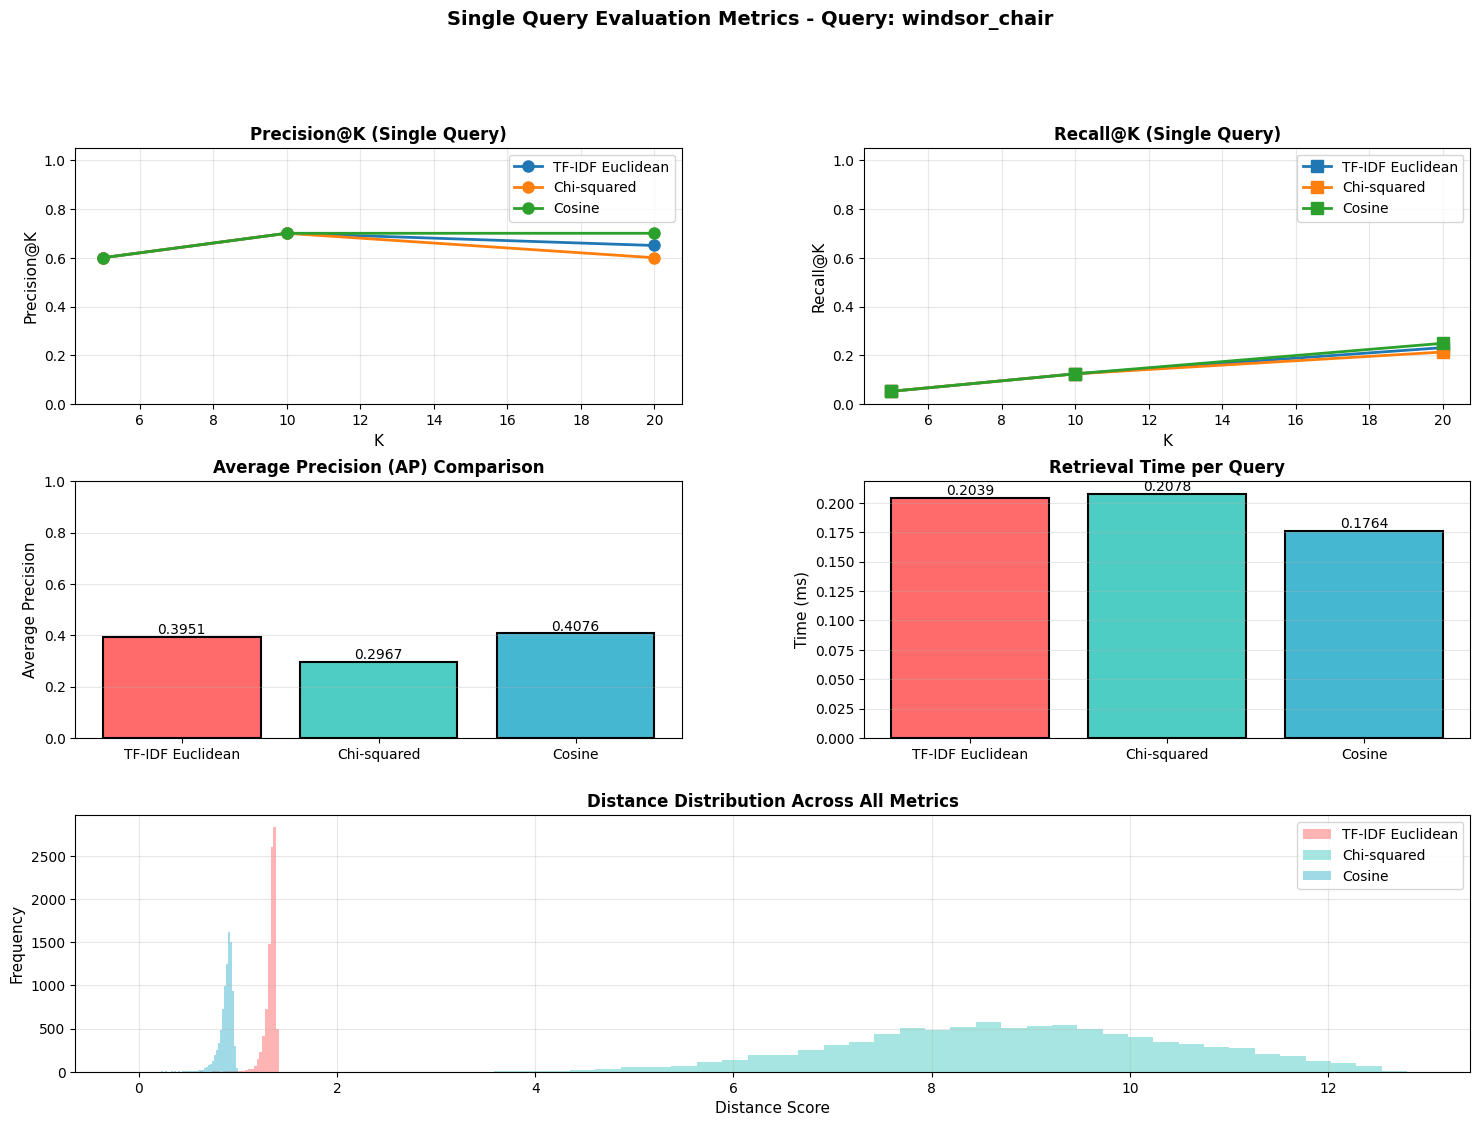

 Visualization complete!



In [ ]:

print("SECTION 5.4: VISUALIZING EVALUATION METRICS")

# Create visualization
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Plot 1: Precision@K for single query
ax1 = fig.add_subplot(gs[0, 0])
metrics_names = list(results.keys())
k_vals = [5, 10, 20]
for metric_name in metrics_names:
    precisions = [results[metric_name].get(f'precision@{k}', 0) for k in k_vals]
    ax1.plot(k_vals, precisions, marker='o', linewidth=2, markersize=8, label=metric_name)

ax1.set_xlabel('K', fontsize=11)
ax1.set_ylabel('Precision@K', fontsize=11)
ax1.set_title('Precision@K (Single Query)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1.05])

# Plot 2: Recall@K for single query
ax2 = fig.add_subplot(gs[0, 1])
for metric_name in metrics_names:
    recalls = [results[metric_name].get(f'recall@{k}', 0) for k in k_vals]
    ax2.plot(k_vals, recalls, marker='s', linewidth=2, markersize=8, label=metric_name)

ax2.set_xlabel('K', fontsize=11)
ax2.set_ylabel('Recall@K', fontsize=11)
ax2.set_title('Recall@K (Single Query)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1.05])

# Plot 3: Average Precision comparison
ax3 = fig.add_subplot(gs[1, 0])
ap_scores = [results[m]['average_precision'] for m in metrics_names]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax3.bar(metrics_names, ap_scores, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Average Precision', fontsize=11)
ax3.set_title('Average Precision (AP) Comparison', fontsize=12, fontweight='bold')
ax3.set_ylim([0, 1])
ax3.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Plot 4: Retrieval Time comparison
ax4 = fig.add_subplot(gs[1, 1])
time_scores = [retrieval_times[m] for m in metrics_names]
bars = ax4.bar(metrics_names, time_scores, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Time (ms)', fontsize=11)
ax4.set_title('Retrieval Time per Query', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Plot 5: Distance distribution (histogram)
ax5 = fig.add_subplot(gs[2, :])
ax5.hist(tfidf_euclidean_distances, bins=50, alpha=0.5, label='TF-IDF Euclidean', color='#FF6B6B')
ax5.hist(chi2_distances, bins=50, alpha=0.5, label='Chi-squared', color='#4ECDC4')
ax5.hist(cosine_distances, bins=50, alpha=0.5, label='Cosine', color='#45B7D1')
ax5.set_xlabel('Distance Score', fontsize=11)
ax5.set_ylabel('Frequency', fontsize=11)
ax5.set_title('Distance Distribution Across All Metrics', fontsize=12, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)

plt.suptitle(f'Single Query Evaluation Metrics - Query: {query_class}',
             fontsize=14, fontweight='bold', y=0.995)
plt.show()

print(" Visualization complete!\n")

To properly evaluate the retrieval system, we test it on multiple queries from different categories. This gives us a more reliable assessment of system performance across the entire dataset. We evaluate on 20 random queries and compute aggregate statistics.


In [ ]:

print("SECTION 5.5: BATCH EVALUATION OVER MULTIPLE QUERIES")

# Define number of queries to evaluate
num_test_queries = 20

print(f"\nEvaluating system over {num_test_queries} random queries...\n")

# Randomly select query indices
test_query_indices = np.random.choice(
    len(all_bovw_histograms_np),
    size=num_test_queries,
    replace=False
)

# Store results
batch_results = {
    'TF-IDF Euclidean': [],
    'Chi-squared': [],
    'Cosine': []
}

query_labels_list = []
all_aps = {metric: [] for metric in batch_results.keys()}
all_precisions = {metric: {k: [] for k in [5, 10, 20]} for metric in batch_results.keys()}
all_recalls = {metric: {k: [] for k in [5, 10, 20]} for metric in batch_results.keys()}

# Process each query
for query_idx in test_query_indices:
    query_bovw = all_bovw_histograms_np[query_idx]
    query_label = all_image_labels_np[query_idx]
    query_labels_list.append(query_label)


    # Compute distances for this query
    query_bovw_2d = query_bovw.reshape(1, -1)
    query_bovw_tfidf = tfidf_transformer.transform(query_bovw_2d).toarray()[0]
    query_bovw_tfidf = query_bovw_tfidf / (np.linalg.norm(query_bovw_tfidf) + 1e-10)

    tfidf_euc = np.array([euclidean(query_bovw_tfidf, hist)
                          for hist in all_bovw_histograms_tfidf])
    chi2 = np.array([chi2_distance(query_bovw, hist)
                     for hist in all_bovw_histograms_np])
    cos = np.array([
    cosine(query_bovw_tfidf, hist)
    for hist in all_bovw_histograms_tfidf
])


    # Create evaluator for this query
    query_evaluator = RetrievalEvaluator(k_values=[5, 10, 20])

    query_distances_dict = {
        'TF-IDF Euclidean': tfidf_euc,
        'Chi-squared': chi2,
        'Cosine': cos
    }

    # Evaluate
    query_results = query_evaluator.evaluate_retrieval_system(
        query_distances_dict, query_label, all_image_labels_np
    )

    # Store results
    for metric_name, metrics in query_results.items():
        all_aps[metric_name].append(metrics['average_precision'])
        for k in [5, 10, 20]:
            all_precisions[metric_name][k].append(metrics[f'precision@{k}'])
            all_recalls[metric_name][k].append(metrics[f'recall@{k}'])

print(" Batch evaluation complete!\n")

SECTION 5.5: BATCH EVALUATION OVER MULTIPLE QUERIES

Evaluating system over 20 random queries...

 Batch evaluation complete!



After evaluating all queries, we compute aggregate statistics (means) for each distance metric. These statistics give us the average performance of the system and are essential for the final report and comparison table.


In [ ]:
print("SECTION 5.6: BATCH STATISTICS SUMMARY")

batch_stats = {}
for metric_name in batch_results.keys():
    batch_stats[metric_name] = {
        'mAP': np.mean(all_aps[metric_name]),
        'precision@5': np.mean(all_precisions[metric_name][5]),
        'precision@10': np.mean(all_precisions[metric_name][10]),
        'precision@20': np.mean(all_precisions[metric_name][20]),
        'recall@5': np.mean(all_recalls[metric_name][5]),
        'recall@10': np.mean(all_recalls[metric_name][10]),
        'recall@20': np.mean(all_recalls[metric_name][20]),
        'retrieval_time': retrieval_times[metric_name]
    }

print("\nBATCH EVALUATION RESULTS (MULTIPLE QUERIES)")

for metric_name, stats in batch_stats.items():
    print(f"\n{metric_name}")

    print(f"  mAP: {stats['mAP']:.4f}")
    print(f"  Precision@5:  {stats['precision@5']:.4f}  | Recall@5:  {stats['recall@5']:.4f}")
    print(f"  Precision@10: {stats['precision@10']:.4f}  | Recall@10: {stats['recall@10']:.4f}")
    print(f"  Precision@20: {stats['precision@20']:.4f}  | Recall@20: {stats['recall@20']:.4f}")
    print(f"  Retrieval Time: {stats['retrieval_time']:.4f} ms")


SECTION 5.6: BATCH STATISTICS SUMMARY

BATCH EVALUATION RESULTS (MULTIPLE QUERIES)

TF-IDF Euclidean
  mAP: 0.1052
  Precision@5:  0.4100  | Recall@5:  0.0198
  Precision@10: 0.2900  | Recall@10: 0.0254
  Precision@20: 0.2225  | Recall@20: 0.0364
  Retrieval Time: 0.2039 ms

Chi-squared
  mAP: 0.0680
  Precision@5:  0.3500  | Recall@5:  0.0182
  Precision@10: 0.2150  | Recall@10: 0.0204
  Precision@20: 0.1575  | Recall@20: 0.0288
  Retrieval Time: 0.2078 ms

Cosine
  mAP: 0.1052
  Precision@5:  0.4100  | Recall@5:  0.0198
  Precision@10: 0.2900  | Recall@10: 0.0254
  Precision@20: 0.2225  | Recall@20: 0.0364
  Retrieval Time: 0.1764 ms



This table summarizes the performance of all three distance metrics across all evaluation measures. It will be included in your final report and provides a clear comparison of their effectiveness and efficiency.


In [ ]:
print("SECTION 5.7: PERFORMANCE COMPARISON TABLE")


# Create DataFrame
comparison_data = {
    'Distance Metric': list(batch_stats.keys()),
    'mAP': [batch_stats[m]['mAP'] for m in batch_stats.keys()],
    'P@5': [batch_stats[m]['precision@5'] for m in batch_stats.keys()],
    'R@5': [batch_stats[m]['recall@5'] for m in batch_stats.keys()],
    'P@10': [batch_stats[m]['precision@10'] for m in batch_stats.keys()],
    'R@10': [batch_stats[m]['recall@10'] for m in batch_stats.keys()],
    'P@20': [batch_stats[m]['precision@20'] for m in batch_stats.keys()],
    'R@20': [batch_stats[m]['recall@20'] for m in batch_stats.keys()],
    'Time (ms)': [batch_stats[m]['retrieval_time'] for m in batch_stats.keys()]
}

comparison_df = pd.DataFrame(comparison_data)

print("PERFORMANCE COMPARISON TABLE")


# Save to CSV
comparison_df.to_csv('retrieval_evaluation_results.csv', index=False)
print("\n Results saved to 'retrieval_evaluation_results.csv'\n")

# Display as table
display(comparison_df)

SECTION 5.7: PERFORMANCE COMPARISON TABLE
PERFORMANCE COMPARISON TABLE

 Results saved to 'retrieval_evaluation_results.csv'



Distance Metric       mAP   P@5       R@5   P@10      R@10    P@20  \
0  TF-IDF Euclidean  0.105226  0.41  0.019795  0.290  0.025400  0.2225   
1       Chi-squared  0.068049  0.35  0.018192  0.215  0.020406  0.1575   
2            Cosine  0.105226  0.41  0.019795  0.290  0.025400  0.2225   

       R@20  Time (ms)  
0  0.036387   0.203948  
1  0.028753   0.207772  
2  0.036387   0.176365

We create comprehensive visualizations comparing the performance of all three distance metrics. These plots show precision, recall, mAP, and retrieval time comparisons, making it easy to see which metric performs best.


SECTION 5.8: VISUALIZING BATCH EVALUATION RESULTS


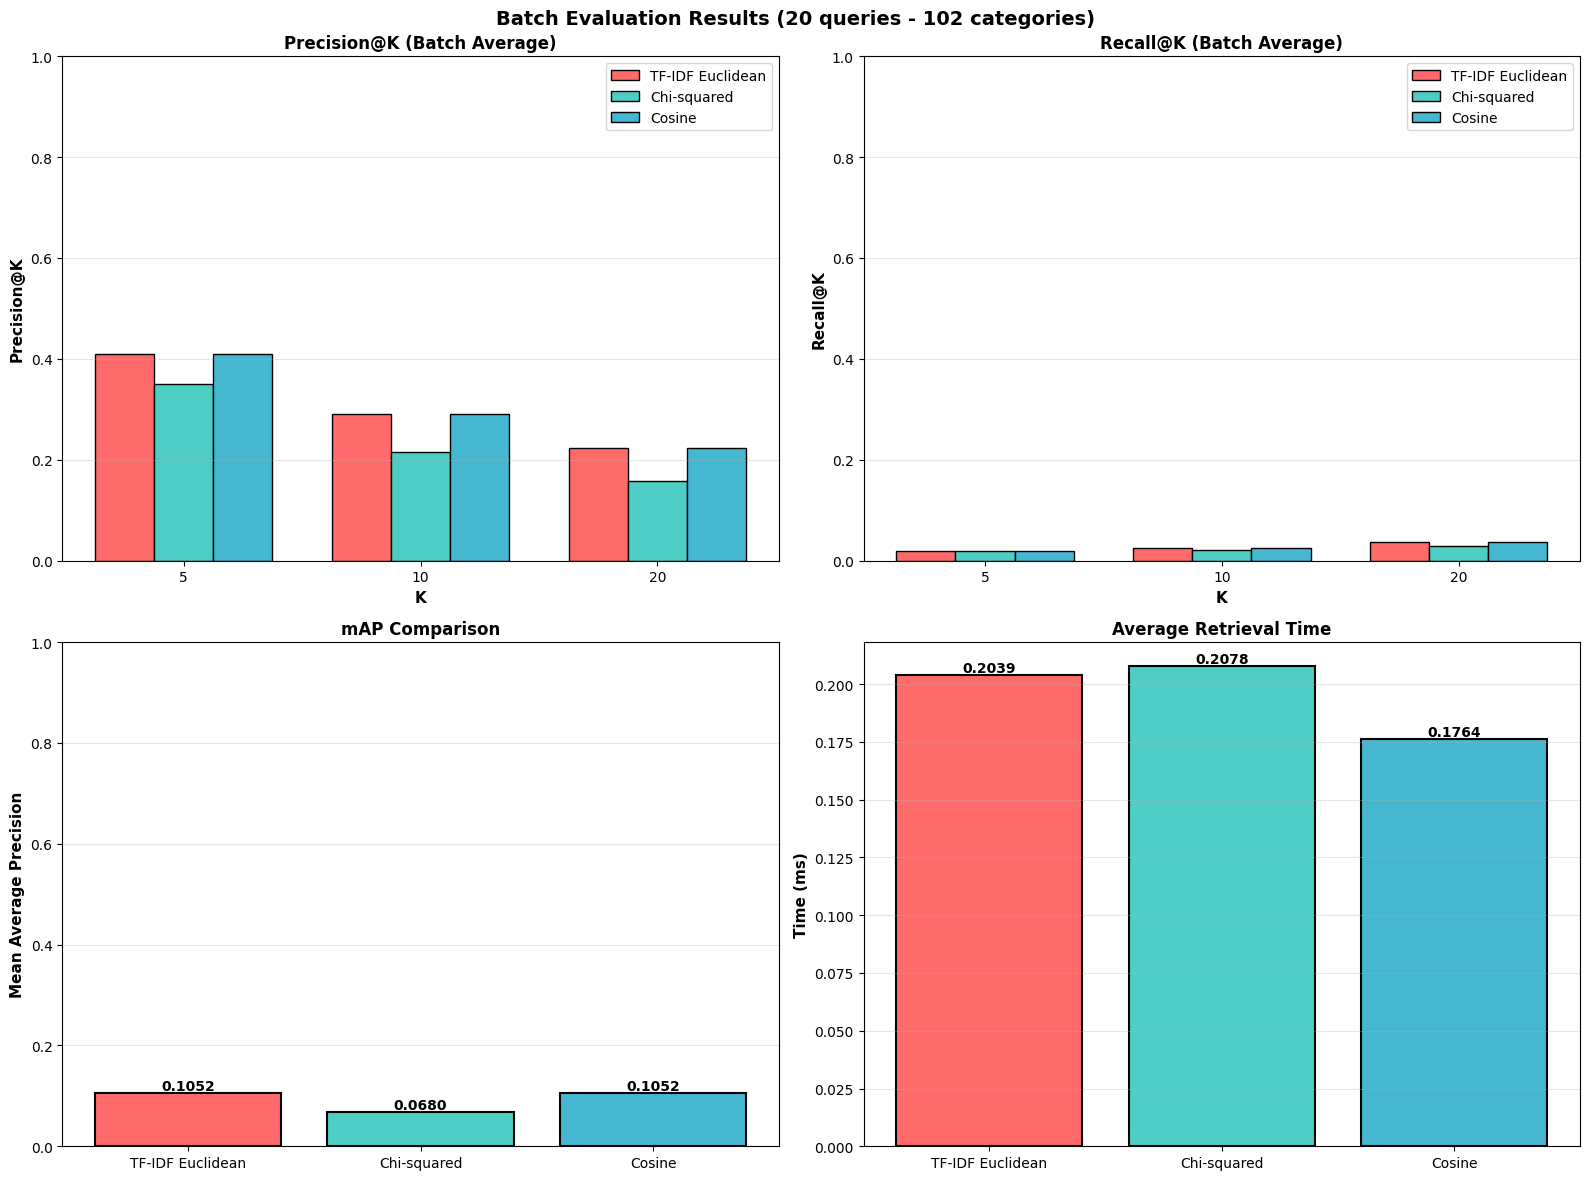

 Batch evaluation visualization complete!



In [ ]:
print("SECTION 5.8: VISUALIZING BATCH EVALUATION RESULTS")


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metric_names = list(batch_stats.keys())
k_values = [5, 10, 20]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Plot 1: Precision@K comparison
ax = axes[0, 0]
x = np.arange(len(k_values))
width = 0.25
for i, metric in enumerate(metric_names):
    precisions = [batch_stats[metric][f'precision@{k}'] for k in k_values]
    ax.bar(x + i*width, precisions, width, label=metric, color=colors[i], edgecolor='black')
ax.set_xlabel('K', fontsize=11, fontweight='bold')
ax.set_ylabel('Precision@K', fontsize=11, fontweight='bold')
ax.set_title('Precision@K (Batch Average)', fontsize=12, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(k_values)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1])

# Plot 2: Recall@K comparison
ax = axes[0, 1]
for i, metric in enumerate(metric_names):
    recalls = [batch_stats[metric][f'recall@{k}'] for k in k_values]
    ax.bar(x + i*width, recalls, width, label=metric, color=colors[i], edgecolor='black')
ax.set_xlabel('K', fontsize=11, fontweight='bold')
ax.set_ylabel('Recall@K', fontsize=11, fontweight='bold')
ax.set_title('Recall@K (Batch Average)', fontsize=12, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(k_values)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1])

# Plot 3: mAP comparison
ax = axes[1, 0]
map_scores = [batch_stats[m]['mAP'] for m in metric_names]
bars = ax.bar(metric_names, map_scores, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Mean Average Precision', fontsize=11, fontweight='bold')
ax.set_title('mAP Comparison', fontsize=12, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars, map_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 4: Retrieval time comparison
ax = axes[1, 1]
time_scores = [batch_stats[m]['retrieval_time'] for m in metric_names]
bars = ax.bar(metric_names, time_scores, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Time (ms)', fontsize=11, fontweight='bold')
ax.set_title('Average Retrieval Time', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars, time_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle(f'Batch Evaluation Results ({num_test_queries} queries - {len(categories)} categories)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" Batch evaluation visualization complete!\n")


Based on the evaluation metrics computed above:

**Key Findings:**
- The **mAP** (Mean Average Precision) indicates which distance metric achieves the best overall retrieval performance
- **Precision@K** shows how accurate the top-K results are
- **Recall@K** shows what percentage of all relevant images are found in the top-K
- **Retrieval Time** demonstrates the computational efficiency of each metric

These results should be included in your final report with interpretation of why certain metrics perform better for your specific dataset and feature representation.


In [ ]:
print("SECTION 5: EVALUATION COMPLETE - FINAL SUMMARY")

# Find best performing metric by mAP
best_metric = max(batch_stats.items(), key=lambda x: x[1]['mAP'])
worst_metric = min(batch_stats.items(), key=lambda x: x[1]['mAP'])
fastest_metric = min(batch_stats.items(), key=lambda x: x[1]['retrieval_time'])

print("\n PERFORMANCE SUMMARY:")
print(f"\n Best Performing Metric (by mAP):  {best_metric[0]} ({best_metric[1]['mAP']:.4f})")
print(f" Worst Performing Metric (by mAP): {worst_metric[0]} ({worst_metric[1]['mAP']:.4f})")
print(f" Fastest Metric:                  {fastest_metric[0]} ({fastest_metric[1]['retrieval_time']:.4f} ms)")

print("\n METRIC RANKINGS (by mAP):")
ranked_metrics = sorted(batch_stats.items(), key=lambda x: x[1]['mAP'], reverse=True)
for rank, (metric_name, stats) in enumerate(ranked_metrics, 1):
    print(f"{rank}. {metric_name:<30} mAP: {stats['mAP']:.4f}")

print(" All evaluation measures completed successfully!")
print(" Results saved to 'retrieval_evaluation_results.csv'")
print(" All visualizations generated")


SECTION 5: EVALUATION COMPLETE - FINAL SUMMARY

 PERFORMANCE SUMMARY:

 Best Performing Metric (by mAP):  TF-IDF Euclidean (0.1052)
 Worst Performing Metric (by mAP): Chi-squared (0.0680)
 Fastest Metric:                  Cosine (0.1764 ms)

 METRIC RANKINGS (by mAP):
1. TF-IDF Euclidean               mAP: 0.1052
2. Cosine                         mAP: 0.1052
3. Chi-squared                    mAP: 0.0680
 All evaluation measures completed successfully!
 Results saved to 'retrieval_evaluation_results.csv'
 All visualizations generated
